In [1]:
!pip install pydicom
!pip install seaborn
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.0 MB/s eta 0:00:00


Enter the path for stroke DICOM ZIP file: /content/stroke.zip
Enter the path for no stroke DICOM ZIP file: /content/normal_dcm.zip
Enter the path for test DICOM ZIP file: /content/test.zip
Enter the path for test labels Excel file: /content/cevaplar.xlsx
Error reading ./stroke_dcm/stroke/10187.dcm: Unable to decompress 'JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])' pixel data because all plugins are missing dependencies:
	gdcm - requires gdcm>=3.0.10
	pylibjpeg - requires pylibjpeg>=2.0 and pylibjpeg-libjpeg>=2.1
Error reading ./stroke_dcm/stroke/12850.dcm: Unable to decode the pixel data as the dataset's 'file_meta' has no (0002,0010) 'Transfer Syntax UID' element
Error reading ./stroke_dcm/stroke/11380.dcm: Unable to decompress 'JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])' pixel data because all plugins are missing dependencies:
	gdcm - requires gdcm>=3.0.10
	pylibjpeg - requires pylibjpeg>=2.0 a

/usr/local/lib/python3.11/dist-packages/pydicom/filereader.py:487: UserWarning: End of file reached before delimiter (FFFE,E0DD) found in file ./stroke_dcm/stroke/15806.dcm
  warn_and_log(msg, UserWarning)


Error reading ./stroke_dcm/stroke/15806.dcm: The dataset has no 'Pixel Data', 'Float Pixel Data' or 'Double Float Pixel Data' element, no pixel data to decode
Error reading ./stroke_dcm/stroke/10690.dcm: Unable to decompress 'JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])' pixel data because all plugins are missing dependencies:
	gdcm - requires gdcm>=3.0.10
	pylibjpeg - requires pylibjpeg>=2.0 and pylibjpeg-libjpeg>=2.1
Error reading ./no_stroke_dcm/normal_dcm/10727.dcm: Unable to decode the pixel data as the dataset's 'file_meta' has no (0002,0010) 'Transfer Syntax UID' element


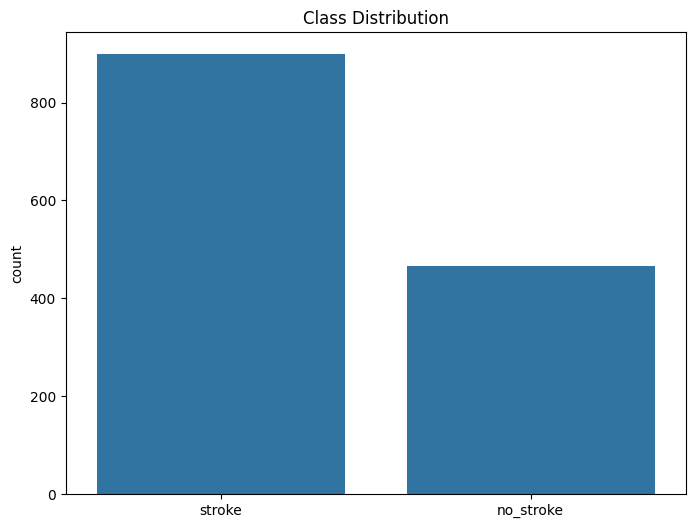

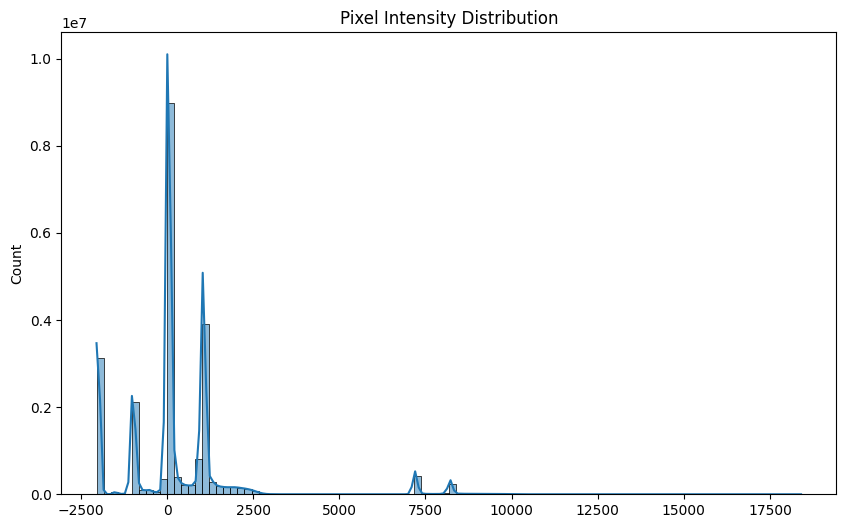

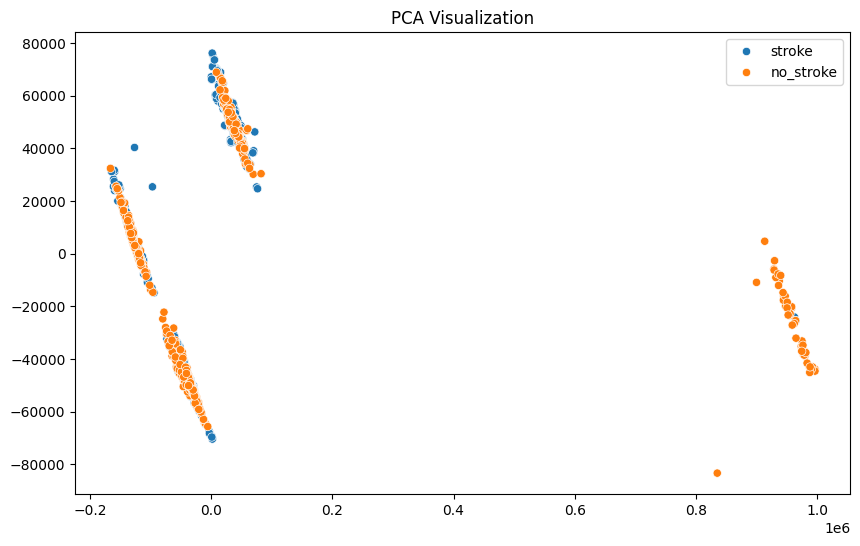

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 1)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 1)    │              3 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 1)    │              0 │ normalization[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            288 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand         │ (None, 1, 1, 32)       │            288 │ block1a_se_reduce[0][… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,051,553 (15.46 MB)

 Trainable params: 4,009,534 (15.30 MB)

 Non-trainable params: 42,019 (164.14 KB)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


28/28 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5570 - loss: 0.7564 - val_accuracy: 0.6575 - val_loss: 0.6443
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.6840 - loss: 0.6854 - val_accuracy: 0.6575 - val_loss: 0.6479
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.6659 - loss: 0.7354 - val_accuracy: 0.6575 - val_loss: 0.6457
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.6929 - loss: 0.7003 - val_accuracy: 0.6575 - val_loss: 0.6723
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.7130 - loss: 0.6465 - val_accuracy: 0.6575 - val_loss: 0.6504
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.6887 - loss: 0.6165 - val_accuracy: 0.6575 - val_loss: 0.6736
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7486 - loss: 0.5655 - val_accuracy: 0.6575 - val_loss: 0.7403
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7403 - loss: 0.5454 - val_accuracy: 0.6575 - val_loss: 0.

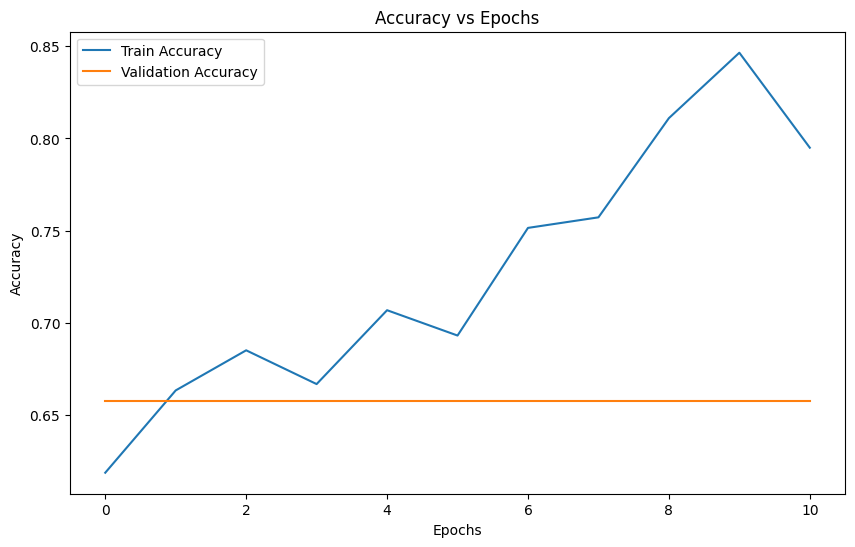

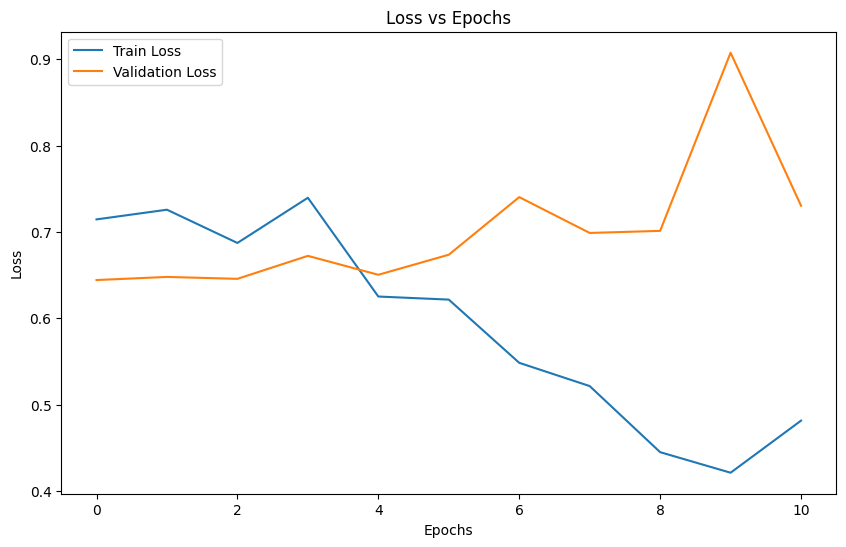

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.6175 - loss: 0.6656
Test Results: [0.644594132900238, 0.6569343209266663]


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 1))
  warnings.warn(msg)


9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 961ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

   no_stroke       0.00      0.00      0.00        94
      stroke       0.66      1.00      0.79       180

    accuracy                           0.66       274
   macro avg       0.33      0.50      0.40       274
weighted avg       0.43      0.66      0.52       274



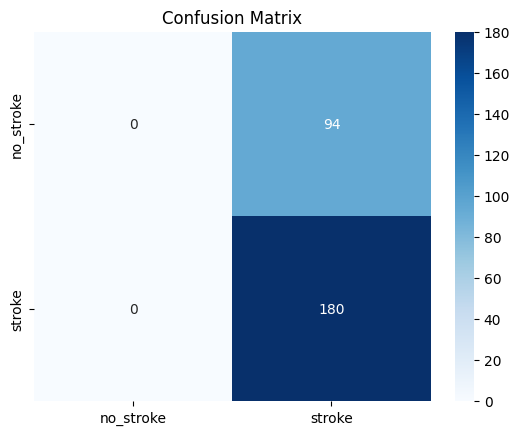

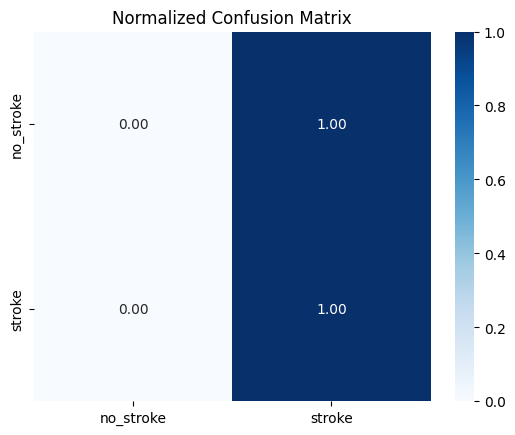

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


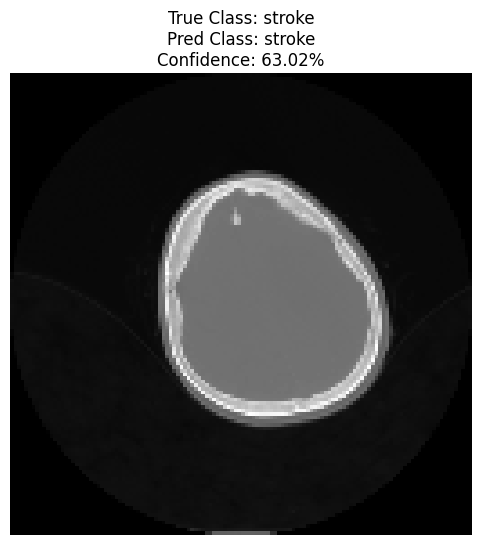

In [2]:
import os
import zipfile
import numpy as np
import pandas as pd
import pydicom
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.metrics import classification_report, confusion_matrix

# User inputs
DICOM_FILES = {
    'stroke': input("Enter the path for stroke DICOM ZIP file: "),
    'no_stroke': input("Enter the path for no stroke DICOM ZIP file: "),
}
TEST_ZIP_PATH = input("Enter the path for test DICOM ZIP file: ")  # Test ZIP file path
TEST_LABELS_PATH = input("Enter the path for test labels Excel file: ")  # Test labels Excel path

IMG_SIZE = 128
CATEGORIES = ['no_stroke', 'stroke']

# ZIP extraction

def extract_zip(zip_path, extract_to):
    if not os.path.exists(extract_to):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)

# Load test labels
def load_test_labels(test_labels_path):
    df = pd.read_excel(test_labels_path)
    return dict(zip(df['Image Id'], df['İnme Var mı?']))

# Load DICOM data
def load_dicom_data():
    data, labels = [], []

    for category, zip_path in DICOM_FILES.items():
        extract_path = f"./{category}_dcm"
        extract_zip(zip_path, extract_path)

        for root, _, files in os.walk(extract_path):
            for file in files:
                file_path = os.path.join(root, file)
                try:
                    dcm = pydicom.dcmread(file_path, force=True)
                    img = dcm.pixel_array
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append(category)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    return np.array(data), np.array(labels)

# Load test DICOM data
def load_test_dicom_data(test_dicom_dir, test_labels):
    data, labels = [], []

    for file in os.listdir(test_dicom_dir):
        if file.endswith(".dcm"):
            image_id = os.path.splitext(file)[0]
            label = test_labels.get(int(image_id), None)

            if label is not None:
                file_path = os.path.join(test_dicom_dir, file)
                try:
                    dcm = pydicom.dcmread(file_path, force=True)
                    img = dcm.pixel_array
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    return np.array(data), np.array(labels)

# Extract test data
extract_zip(TEST_ZIP_PATH, "./test_dicom/")

# Load training data
data, labels = load_dicom_data()

# Load test data and labels
test_labels = load_test_labels(TEST_LABELS_PATH)
test_data, test_labels = load_test_dicom_data("./test_dicom", test_labels)

# Data analysis
plt.figure(figsize=(8, 6))
sns.countplot(x=labels)
plt.title('Class Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data.ravel(), bins=100, kde=True)
plt.title("Pixel Intensity Distribution")
plt.show()

flat_data = data.reshape(data.shape[0], -1)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(flat_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=labels)
plt.title("PCA Visualization")
plt.show()

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data, labels_categorical, test_size=0.2, stratify=labels_encoded, random_state=42
)

# Normalize data
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

def build_efficientnet_model():
    base_model = EfficientNetB0(include_top=False, weights=None, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 1)))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    output = Dense(len(CATEGORIES), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build model
model = build_efficientnet_model()
model.summary()

checkpoint = ModelCheckpoint("EfficientNet_model_epoch_{epoch:02d}.keras", save_freq='epoch', save_best_only=False)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
csv_logger = CSVLogger("EfficientNet_training_history.csv")

history = model.fit(
    X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[checkpoint, early_stopping, csv_logger]
)

# Plot metrics
def plot_metrics(history, metric):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[metric], label=f'Train {metric.capitalize()}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
    plt.title(f'{metric.capitalize()} vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

plot_metrics(history, 'accuracy')
plot_metrics(history, 'loss')

# Evaluate on test data
results = model.evaluate(X_test, y_test, batch_size=32)
print("Test Results:", results)

# Classification report and confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=CATEGORIES))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.show()

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Normalized Confusion Matrix")
plt.show()

def visualize_prediction(index):
    img = X_test[index].reshape(IMG_SIZE, IMG_SIZE)
    true_class = label_encoder.inverse_transform([y_true[index]])[0]
    pred_probs = model.predict(np.expand_dims(X_test[index], axis=0))[0]
    pred_class = label_encoder.inverse_transform([np.argmax(pred_probs)])[0]
    confidence = np.max(pred_probs) * 100

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f"True Class: {true_class}\nPred Class: {pred_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

visualize_prediction(np.random.randint(len(X_test)))
